In [6]:
from cpymad.madx import Madx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from pybt.tools.plotters import *
from matplotlib.patches import Ellipse, Rectangle
import requests
from madxtools.plot_tool import *

In [7]:
# Beam characteristics
gamma = 25.598474067
beta = np.sqrt(1-gamma**(-2))
exn = 4.92e-06
eyn = 3.4e-06
sige = 0.000412
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)
Brho = 24*3.3356



In [8]:
# Initial conditions empirical measurements
betx0 = 154.0835045206266
bety0 = 5.222566527078791
alfx0 = -36.90472944993891
alfy0 = 0.2523074897915478
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 7.639770207283603e-06
eyn = 3.534081877201574e-06
sige = 0.000679081344780741

#################################### Initialize MADX ####################################
with open('tempfile', 'w') as f:
    madx_meas = Madx(stdout=f,stderr=f)
    madx_meas.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx_meas.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.dbx").text)
madx_meas.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.ele").text)
madx_meas.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.seq").text)
madx_meas.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d_proton.str").text)

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx_meas.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx_meas.input('BRHO      := BEAM->PC * 3.3356;')

madx_meas.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx_meas.input('SEQEDIT, SEQUENCE=f61d;')
madx_meas.input('FLATTEN;')
madx_meas.input('REMOVE, ELEMENT=ARBMATRIX;')
madx_meas.input('FLATTEN;')
madx_meas.input('ENDEDIT;')

madx_meas.input("kQFN1 = "+str(0.4797)+";")
madx_meas.input("kQDN2 = "+str(-0.173)+";")
madx_meas.input("kQFN3 = "+str(0.1986)+";")

madx_meas.use(sequence="f61d")
twiss_f61d = madx_meas.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

In [9]:
# Initial conditions Stray field
betx0 = 155.11241116764313
bety0 = 2.682104074061644
alfx0 = -36.57756982474437
alfy0 = 1.8286185977404674
Dx0 = 0.13
Dy0 = 0.0
Dpx0 = 0.02
Dpy0 = 0.0
exn = 4.549658248792639e-06
eyn = 9.777271920638397e-07
sige = 0.000679081344780741


 #################################### Initialize MADX ####################################
with open('tempfile_stray', 'w') as f:
    madx_stray = Madx(stdout=f,stderr=f)
    madx_stray.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx_stray.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.dbx").text)
madx_stray.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.ele").text)
madx_stray.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d.seq").text)
madx_stray.input(requests.get("https://gitlab.cern.ch/acc-models/acc-models-tls/-/raw/2021/ps_extraction/f61d/f61d_proton.str").text)

ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

madx_stray.command.beam(particle='PROTON',pc="24",exn=exn,eyn=eyn)
madx_stray.input('BRHO      := BEAM->PC * 3.3356;')

madx_stray.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')

madx_stray.input('SEQEDIT, SEQUENCE=f61d;')
madx_stray.input('FLATTEN;')
madx_stray.input('REMOVE, ELEMENT=ARBMATRIX;')
madx_stray.input('FLATTEN;')
madx_stray.input('ENDEDIT;')

madx_meas.use(sequence="f61d")
twiss_f61d = madx_meas.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

NameError: name 'madx' is not defined

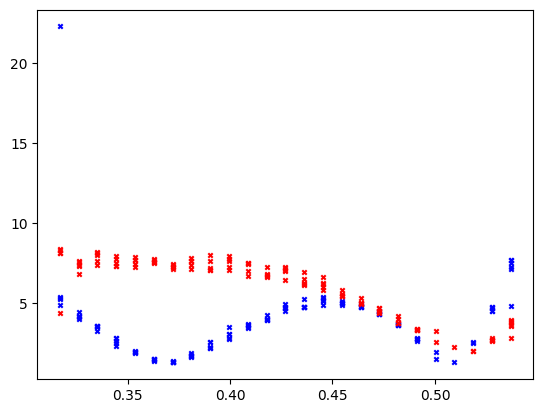

In [10]:
fig, ax = plt.subplots()

df = pd.read_pickle('large_df/df_quad_scan_east_dump_with_filters_2022_07_05_09h41m36s.pickle')

# Measurements
Acqu = 3
ax.scatter(df.loc[df.Acqu==Acqu].k_qfn01, df.loc[df.Acqu==Acqu].poptH3_cal, s=10, marker="x", c="b")
ax.scatter(df.loc[df.Acqu==Acqu].k_qfn01, df.loc[df.Acqu==Acqu].poptV3_cal, s=10, marker="x", c="r")

kQFN01_list = df.loc[df.Acqu==Acqu].k_qfn01
sigma_H_list = []
sigma_V_list = []

for i in range(len(kQFN01_list)):

    kQFN01 = df.loc[df.Acqu==Acqu].iloc[i].k_qfn01
    kQDN02 = df.loc[df.Acqu==Acqu].iloc[i].k_qdn02
    kQFN03 = df.loc[df.Acqu==Acqu].iloc[i].k_qfn03

    madx.input(f"kQFN1 = {kQFN01}")
    madx.input(f"kQDN2 = {kQDN02}")
    madx.input(f"kQFN3 = {kQFN03}")
    twiss_f61d = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

    loc = 'f61.btv010'
    sigma_H = beam_size(twiss_f61d['betx'][loc], twiss_f61d['dx'][loc], ex, sige, 1)*1000
    sigma_V = beam_size(twiss_f61d['bety'][loc], twiss_f61d['dy'][loc], ey, sige, 1)*1000

    sigma_H_list.append(sigma_H)
    sigma_V_list.append(sigma_V)

ax.plot(kQFN01_list, sigma_H_list, c="b", label="MAD-X reconstructed")
ax.plot(kQFN01_list, sigma_V_list, c="r")

ax.set_ylim(0,12)